# Assignment 7 Solution
This assignment is collaborated by Jingting Dai and Hongjie Guan. Hongjie finished A07.1 and Jingting finished A07.2.

## A07.1 - Correlation MSTs

Task: Build MSTs from correlations and analyze them
+ from the correlation matrices, build the Minimum Spanning
Trees (see lecture)
+ assign the correct ticker (’AAPL’, ’AMZN’, ...) as an attribute to the
nodes and calculate the degrees
+ compare the MST degree distributions of the 1 hour, 1 minute,
Normal and One-Factor correlations

In [67]:
import numpy as np
import os
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['figure.figsize'] = (12, 6)

In [6]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'npy' in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split(".")[0]
            print("dataset named "+item_name+" imported")
            d["{}".format(item_name)] = np.load(item_path)
    print("finish importing")
    return d

In [15]:
# import npy files
cormats = import_datasets(r'data-assignment7\New Folder With Items')

dataset named cormat_1h imported
dataset named cormat_1m imported
dataset named cormat_gaussian_1h imported
dataset named cormat_gaussian_1m imported
dataset named cormat_onefactor_1h imported
dataset named cormat_onefactor_1m imported
finish importing


In [42]:
# import stocknames to form the ticker
with open(r'data-assignment7\New Folder With Items\stocknames.txt') as f:
    lines = f.readlines()
    
tickers={}
for i in range(0,len(lines)):
    tickers[i]=lines[i].strip()
print("The stocknames are:")
print(tickers)

The stocknames are:
{0: 'AAPL', 1: 'ABBV', 2: 'ABT', 3: 'ACN', 4: 'AIG', 5: 'ALL', 6: 'AMGN', 7: 'AMZN', 8: 'APA', 9: 'APC', 10: 'AXP', 11: 'BA', 12: 'BAC', 13: 'BAX', 14: 'BIIB', 15: 'BK', 16: 'BMY', 17: 'C', 18: 'CAT', 19: 'CL', 20: 'CMCSA', 21: 'COF', 22: 'COP', 23: 'COST', 24: 'CSCO', 25: 'CVS', 26: 'CVX', 27: 'DD', 28: 'DIS', 29: 'DOW', 30: 'DVN', 31: 'EBAY', 32: 'EMC', 33: 'EMR', 34: 'EXC', 35: 'F', 36: 'FB', 37: 'FCX', 38: 'FDX', 39: 'FOXA', 40: 'GD', 41: 'GE', 42: 'GILD', 43: 'GM', 44: 'GOOG', 45: 'GS', 46: 'HAL', 47: 'HD', 48: 'HON', 49: 'HPQ', 50: 'IBM', 51: 'INTC', 52: 'JNJ', 53: 'JPM', 54: 'KO', 55: 'LLY', 56: 'LMT', 57: 'LOW', 58: 'MA', 59: 'MCD', 60: 'MDLZ', 61: 'MDT', 62: 'MET', 63: 'MMM', 64: 'MO', 65: 'MON', 66: 'MRK', 67: 'MS', 68: 'MSFT', 69: 'NKE', 70: 'NOV', 71: 'NSC', 72: 'ORCL', 73: 'OXY', 74: 'PEP', 75: 'PFE', 76: 'PG', 77: 'PM', 78: 'QCOM', 79: 'RTN', 80: 'SBUX', 81: 'SLB', 82: 'SO', 83: 'SPG', 84: 'T', 85: 'TGT', 86: 'TWX', 87: 'TXN', 88: 'UNH', 89: 'UNP', 90:

In [43]:
graphs = {}
for name,matrix in cormats.items():
    graphs[name]= nx.from_numpy_matrix(matrix)
    nx.set_node_attributes(graphs[name], tickers, 'ticker')

In [44]:
MNTs = {}
for name,graph in graphs.items():
    MNTs[name]= nx.minimum_spanning_tree(graph)

In [51]:
# check if 'ticker' is assigned correctly
print(nx.get_node_attributes(MNTs["cormat_1h"], 'ticker'))

{0: 'AAPL', 1: 'ABBV', 2: 'ABT', 3: 'ACN', 4: 'AIG', 5: 'ALL', 6: 'AMGN', 7: 'AMZN', 8: 'APA', 9: 'APC', 10: 'AXP', 11: 'BA', 12: 'BAC', 13: 'BAX', 14: 'BIIB', 15: 'BK', 16: 'BMY', 17: 'C', 18: 'CAT', 19: 'CL', 20: 'CMCSA', 21: 'COF', 22: 'COP', 23: 'COST', 24: 'CSCO', 25: 'CVS', 26: 'CVX', 27: 'DD', 28: 'DIS', 29: 'DOW', 30: 'DVN', 31: 'EBAY', 32: 'EMC', 33: 'EMR', 34: 'EXC', 35: 'F', 36: 'FB', 37: 'FCX', 38: 'FDX', 39: 'FOXA', 40: 'GD', 41: 'GE', 42: 'GILD', 43: 'GM', 44: 'GOOG', 45: 'GS', 46: 'HAL', 47: 'HD', 48: 'HON', 49: 'HPQ', 50: 'IBM', 51: 'INTC', 52: 'JNJ', 53: 'JPM', 54: 'KO', 55: 'LLY', 56: 'LMT', 57: 'LOW', 58: 'MA', 59: 'MCD', 60: 'MDLZ', 61: 'MDT', 62: 'MET', 63: 'MMM', 64: 'MO', 65: 'MON', 66: 'MRK', 67: 'MS', 68: 'MSFT', 69: 'NKE', 70: 'NOV', 71: 'NSC', 72: 'ORCL', 73: 'OXY', 74: 'PEP', 75: 'PFE', 76: 'PG', 77: 'PM', 78: 'QCOM', 79: 'RTN', 80: 'SBUX', 81: 'SLB', 82: 'SO', 83: 'SPG', 84: 'T', 85: 'TGT', 86: 'TWX', 87: 'TXN', 88: 'UNH', 89: 'UNP', 90: 'UPS', 91: 'USB', 9

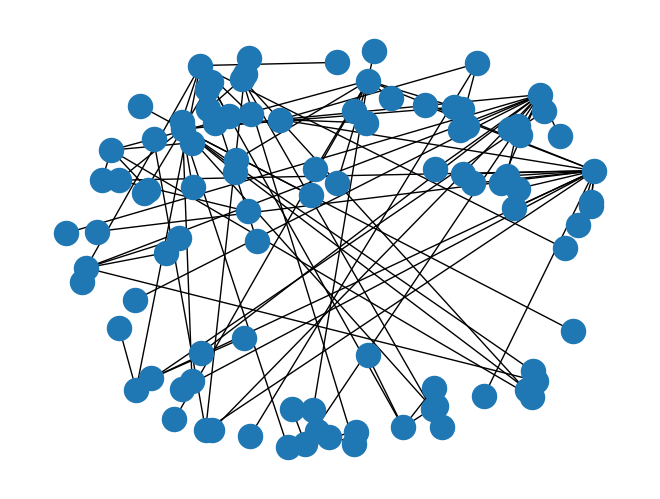

In [45]:
# to visualized the MNT
nx.draw(MNTs["cormat_1h"])

In [53]:
# compute degree distribution
def compute_degree_distribution(graphs:dict)->dict:
    dd={}
    for k,v in graphs.items():
        degress = v.degree()
        dd[k]=[ degress[i] for i in v.nodes() ]
    return dd

In [77]:
degree_distributions=compute_degree_distribution(MNTs)
print("The degree distributions of each MNTs:\n")
print(degree_distributions)

The degree distributions of each MNTs:

{'cormat_1h': [3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 11, 13, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 11, 3, 1, 15, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 6, 1, 1, 1, 1, 17, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'cormat_1m': [1, 5, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 8, 4, 1, 1, 1, 1, 1, 1, 2, 18, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 19, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], 'cormat_gaussian_1h': [2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2, 2, 2, 1, 2, 1, 2, 1, 2, 3, 1, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 4, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 4, 2, 3, 1, 2, 3, 1, 3, 4, 2, 1, 1, 2, 1, 4, 1, 4, 4, 2, 2, 2, 1, 1, 3, 1, 5, 1, 3, 1, 1, 3, 2, 1, 2, 1, 5, 2, 4, 2, 1, 2, 2, 1, 2, 1, 1], 'cormat_gaussian_1m': [

In [71]:
def plot_degree_distribution(degree_distribution:dict,dataset_name:str,scale:str):   
    k_list=degree_distribution[dataset_name]
    l=len(k_list)
    k_unique=np.unique(np.asarray(k_list))
    P_k = [k_list.count(k)/l for k in k_unique]
    plt.scatter(k_unique,P_k,s=4,label="empirical")
    plt.xscale(scale)
    plt.yscale(scale)
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.legend(loc='best')
    plt.title("Degree distribution of the MNTs of {}".format(dataset_name))  

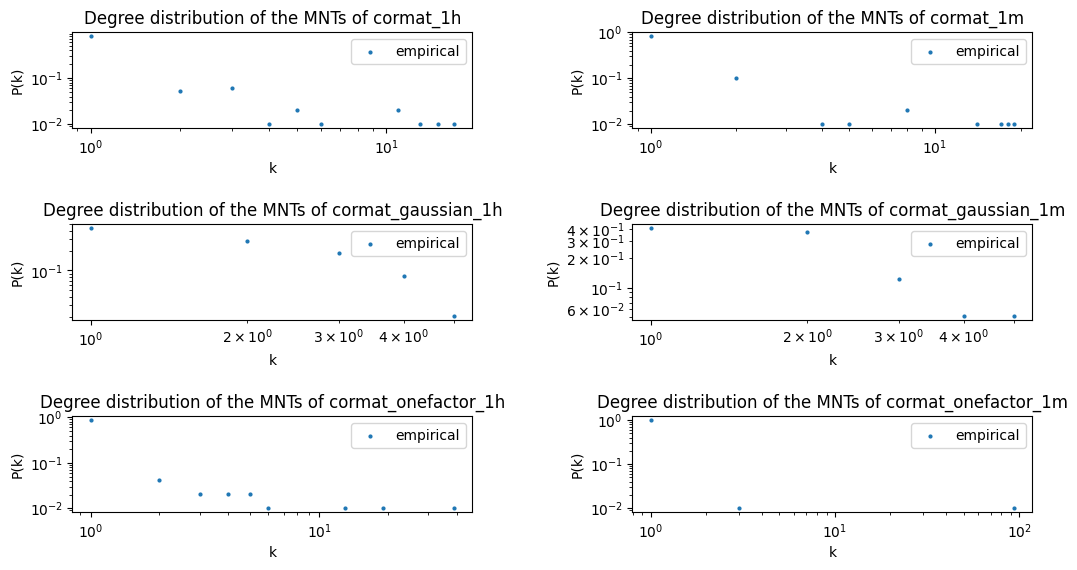

In [75]:
plt.subplot(3,2,1)
plot_degree_distribution(degree_distributions,'cormat_1h',"log")

plt.subplot(3,2,2)
plot_degree_distribution(degree_distributions,'cormat_1m',"log")

plt.subplot(3,2,3)
plot_degree_distribution(degree_distributions,'cormat_gaussian_1h',"log")

plt.subplot(3,2,4)
plot_degree_distribution(degree_distributions,'cormat_gaussian_1m',"log")

plt.subplot(3,2,5)
plot_degree_distribution(degree_distributions,'cormat_onefactor_1h',"log")

plt.subplot(3,2,6)
plot_degree_distribution(degree_distributions,'cormat_onefactor_1m',"log")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1)

plt.show()

## A07.2 - Conclusions

Task: finish the analysis by drawing conclusions 

Answer the following questions (for both timescales):
1. Is there a ‘market mode’?
2. Which are the 5 stocks with highest degree on the 1 minute and
1 hour MST?
3. Is the degree distribution of MSTs qualitatively the same at 1
minute and 1 hour?
4. Is the degree distribution of MSTs well reproduced by the null
Gaussian and One-Factor models?
